# 1. Overview, commands, syntax

Please respond to the brief `entry survey` that helps us better understand what your needs might be on day one. I'll launch it  on [zoom](https://jhjhm.zoom.us/j/98481767907) for both the in-person and virtual attendees. The questions are listed here for your convenience. An identical `exit survey` will be launched on Friday to get a sense of what we've achieved over the five-day period.

1. How will you use Stata from 06/19/2023-06/23/2023?        
     
   + Locally on my laptop
   + Remotely on another desktop or terminal         
     
2. What operating system will you use locally or remotely?      
         
   + MacOSX
   + Unix
   + Windows     

3. Do you have any experience using Stata, SAS, R, Python, or any other statistical software?     
     
   0. **No Experience.** I have no prior experience with Stata and am unfamiliar with the software. Also, I have no experience with other statistical software such as SAS, R, Python, etc.     
   1. **Basic Knowledge.** I have a general understanding of basic commands but I require asistance to perform tasks.
   2. **Novice User.** I am familiar with basic commands and can import data and do basic data cleaning. But I require guidance for more complex analyses.
   3. **Competent User.** I am proficient in using Stata, SAS, R, Python, etc. for data exploration, descriptive statistics, basic inference (t-tests, chi-square tests), and regression
   4. **Advanced User.** I can do multivariable regression and understand various statistical modeling options and techniques available in Stata, SAS, R, etc.
   5. **Expert User.** I can write custom programs, macros, ado-files in Stata. Or I am an expert user of SAS, R, Python, etc. but have little to no experience with Stata.


## 1.1 Overview &#129408;
     
*Ceci n'est pas une crabe* 

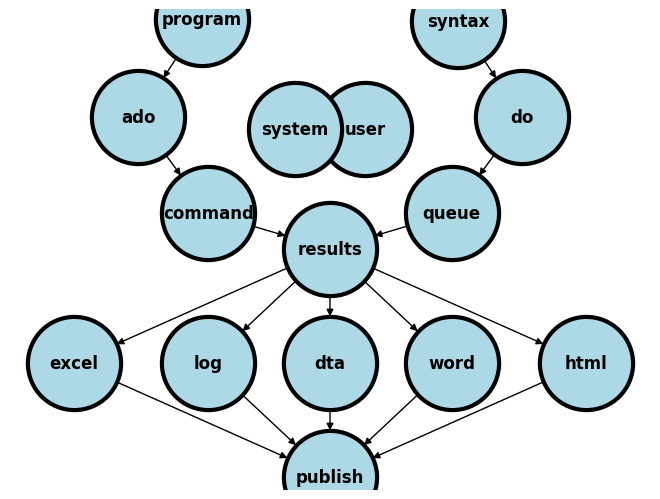

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import numpy as np
#import sklearn as skl
# 

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("user",  pos = (550,500) )
G.add_node("system",  pos = (-550,500) )
G.add_node("program",  pos = (-2000, 960) )
G.add_node("syntax",  pos = (2000, 950) )
G.add_node("ado", pos = (-3000, 550) )
G.add_node("do", pos = (3000, 550) )
G.add_node("command", pos = (-1900, 150) )
G.add_node("queue", pos = (1900, 150) )
G.add_node("results", pos = (0,0))
G.add_node("dta", pos = (0, -475))
G.add_node("log", pos = (-1900, -475))
G.add_node("excel", pos = (-4000, -475))
G.add_node("word", pos = (1900, -475))
G.add_node("html", pos = (4000, -475))
G.add_node("publish", pos = (0, -950))
G.add_edges_from([ ("program","ado"), ("syntax", "do")])
G.add_edges_from([("ado", "command"), ("do", "queue") ])
G.add_edges_from([("command", "results"), ("queue", "results"),("results","excel"),("results","word"),("results","html")])
G.add_edges_from([("results","dta"),("results","log")])
G.add_edges_from([("dta","publish"),("log","publish"),("excel","publish"),("word","publish"),("html","publish")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 4500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()

We are going to distinguish between two fundamental perspectives in this class:
 
+ System
   + Native (stata application, support files, `.ado` files)
      + If you type `which help` into your command window you get something like: `/Applications/Stata/ado/base/h/help.ado`
   + Third-party (typically `.ado` files)
      + When I type `which table1_afecdvi` I get `/Applications/Stata/ado/base/t/table1_afecdvi.ado`
   + Your `.ado` files (you'll learn to write & install your own programs)  
      + Since you don't have `table1_afecdvi.ado` installed you'll get `command table1_afecdv not found as either built-in or ado-file`  
        
+ User
   + Known
      + Instructor
      + Teaching assistants
      + Students
      + Collaborators

   + Unknown
      + Anticipate (emphathize with different kinds of users)
      + Share code (on GitHub, for instance)
      + Care (user-friendly, annotated code)

The `system` is the <u>Stata application</u> and its a simple noun. It is not <strike>STATA</strike>, which gives the impression of being an acronym. I presume you’ve all installed Stata onto your local machines. If not I presume you’ll be doing so very soon or you will be remotely accessing it. The `user` includes you, me, the teaching assistants, collaborators, or strangers.

As a user, you will or have already downloaded and installed a system of programs, mostly ado-files, which form the foundation of all the commands you will be using in Stata. These are the **native** Stata system files.

But soon you will begin to write your own Stata programs or `.ado` files and install them into the system folders (as I've done with `table1_afecdvi.ado`). Then, it will be helpful to think of your role as part of the system. In your new role as system, it will be helpful to anticipate the needs of the known and unknown future users of your program. This will call for **empathy** (anticipating user needs), **sharing** (your code with others), and **caring** (that its user-friendly).
       
+ Installation
   + Local
      + MacOSX
      + Unix
      + Windows

   + Remote
      + Desktop
         + Windows
      + Cluster
         + Unix/Terminal
     
+ Local
   + [Menu](https://www.stata.com/manuals13/gsw2.pdf#gsw2TheStatauserinterface)
      + file 
      + edit
      + view
      + data 
      + graphics
      + statistics
      + user
      + window
         + command &#8984; 1
         + results &#8984; 2
         + history &#8984; 3
         + variables &#8984; 4
         + properties &#8984; 5
         + graph &#8984; 6
         + viewer &#8984; 7
         + editor &#8984; 8
         + do-file &#8984; 9
         + manager &#8984; 10
      + help
          
   + Command     
      + The very first `valid` word you type into the command window or on a line of code in a do file
      + Rendered blue in color if its a <u>native</u> Stata command (on my machine)
      + A <u>third-party</u> program/command appears white and may not work if you share your do file with others
      + Your collaborators, TAs, and instructors must be warned about the need to first install such third-party programs     
           
   + Syntax
      + The arrangement of words after a Stata command
      + Create well-formed instructions in Stata (i.e., the syntax of Stata)
      + Other terms or synonyms include code, Stata code, code snippet.        
           
   + Input
      + Menu (**see above:** a menu-driven task outputs command and syntax in the results window)
      + do files (Stata script with a sequence of commands; you can copy & paste some from the results window)
      + ado files (Stata script with a program or a series of programs for specific or general tasks)      
           
   + Output/Results   
      + String   
         + text (e.g., `str49` below = string of 49 characters <u>including spaces</u>) 
            + `The median age in this population is 40 years old`
         + url 
            + `https://www.stata-press.com/data/r8`
         + filepath 
            + `/users/d/desktop`
              
      + Numeric (types by range)
         + integer
            + `byte`: $-127$ to $100$ 
            + `int`: $-32767$ to $32740$
            + `long`: $\pm   2$ billion
         + decimal
            + `float`: $\pm   10^{38}$ billion
            + `double`: $\pm   10^{307}$ billion


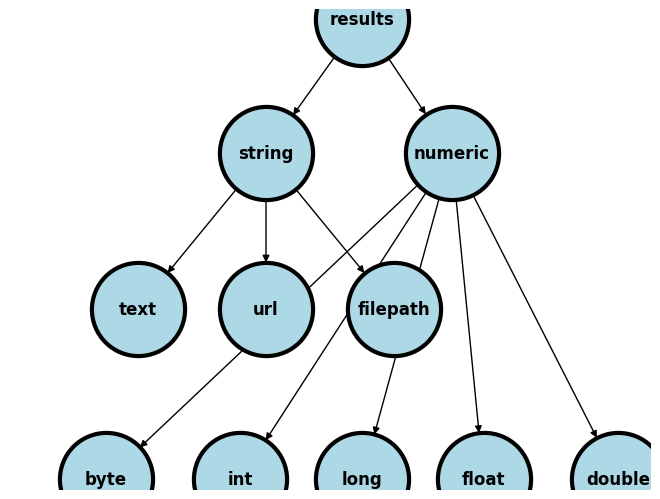

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("results", pos = (500,960))
G.add_node("string", pos = (-1000, 400) )
G.add_node("numeric", pos = (1900, 400) )
G.add_node("text", pos = (-3000, -250) )
G.add_node("url", pos = (-1000, -250) )
G.add_node("filepath", pos = (1000, -250) )
G.add_node("long", pos = (500, -960))
G.add_node("int", pos = (-1400, -960))
G.add_node("byte", pos = (-3500, -960))
G.add_node("float", pos = (2400, -960))
G.add_node("double", pos = (4500, -960))
G.add_edges_from([ ("results","string")])
G.add_edges_from([("string", "text"),("string", "url") ,("string", "filepath")])
G.add_edges_from([("numeric","byte"),("numeric","float"),("numeric","double"),("numeric","int")])
G.add_edges_from([("numeric","long"),("results","numeric")])

nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 4500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()


   + Embed
      + Results window
      + Graph
      + File: excel, log, dta, word, [html](dyndoc.md), etc.

   + Publish/[Markup](https://en.wikipedia.org/wiki/Markup_language)
      + Self (e.g., GitHub)
      + Journal (e.g. JAMA)
      + Commercial (e.g. Pfizer Ad)


Let's use a simple example to illustrate some of the terms we've introduced:

+ Menu 
   + file > example datasets > lifeexp.dta > use
   + `sysuse lifeexp.dta`
   + `webuse lifeexp.dta`
   + `use https://www.stata-press.com/data/r8/lifeexp.dta`    


+ do file
   + Importing data
   + Exploring data 
   + Analyzing data
   + Outputing results
       
+ ado file
   + basis of Stata commands
+ etc.

## 1.2 Command

Let's instruct Stata to import some data:

```stata
webuse lifeexp, clear
```

```stata
. webuse lifeexp, clear
(Life expectancy, 1998)

. 
```

The results window has some output informing us that we've imported Life expectancy data from 1998. Now let's explore these imported data:

```stata
display c(N) 
display c(k)
describe 
```

```stata
. display c(N) 
68

. display c(k)
6

. describe 

Contains data from https://www.stata-press.com/data/r18/lifeexp.dta
Observations:            68                  Life expectancy, 1998
Variables:                6                  26 Mar 2022 09:40
(_dta has notes)
		
Variable      Storage   Display    Value
name            type    format     label      Variable label
		
region          byte    %16.0g     region     Region
country         str28   %28s                  Country
popgrowth       float   %9.0g               * Avg. annual % growth
lexp            byte    %9.0g               * Life expectancy at birth
gnppc           float   %9.0g               * GNP per capita
safewater       byte    %9.0g               * Safe water
* indicated variables have	notes
		
Sorted by: 

. 
```

By now you should be quick to point out that `display` is a command. To better understand what this command does, you can type `help display` in the command window. If you do so, you'll learn the following:

```stata
[P] display	--	Display strings and values of scalar expressions
			(View complete PDF manual entry)
```

We've already discussed (see **output** above) <u>string</u> and <u>numeric</u> values as the two types of output we will be dealing with in Stata. So the `display` command displays, as it were, these **values** based on the specific syntax you provide

Output values will typically have two properties:
   + Name (e.g. `c(N)` and `c(k)`)  
   + Content (i.e., number of observations and number of variables)

Such values as we will learn tomorrow are called <u>macros</u>. In this given example, these are system-defined macros. And as you might have already guessed, there are also user-defined macros. More on this tomorrow!

For now, let's perform a basic analysis on our imported data to learn a little more about syntax and output:

```stata
webuse lifeexp, clear 
encode country, gen(Country)
twoway scatter lexp Country, xscale(off)
graph export lexp_bycountry.png, replace 
```

```stata
. webuse lifeexp, clear 
(Life expectancy, 1998)

. encode country, gen(Country)

. twoway scatter lexp Country, xscale(off)

. graph export lexp_bycountry.png, replace 
file /Users/d/Desktop/lexp_bycountry.png saved as PNG format

. 

```

![](lexp_bycountry.png)


## 1.3 Syntax

A few commands are useful on their own: 

```stata
chelp
pwd
```

To name but a few. But the vast majority of commands will only work in context of the appropriate syntax. In this example below, the command `clear` is useful on its own. But `set` only becomes useful with additional syntax. Here we have `obs 1000`, instructing Stata to create an empty dataset with 1000 observations. The command `generate` with syntax `bmi=rnormal(28,5)` then instructs Stata to create a new variable `bmi` in a simulation of a random sampling process with replacement, 1000 times over, from a population with mean bmi of 28 and standard deviation of 5. Stata is then instructed to create a histogram of these simulated bmi sample and save the figure as a .PNG image. Hopefully this clarifies what a Stata command is and what syntax is. Together these make up Stata code.    

```stata
 clear 
 set obs 1000
 generate bmi=rnormal(28,5)
 histogram bmi, normal
 graph export bmi.png, replace 
```

```stata

.  clear 

.  set obs 1000
Number of observations (_N) was 0, now 1,000.

.  generate bmi=rnormal(28,5)

.  histogram bmi, normal
(bin=29, start=13.457429, width=.99248317)

.  graph export bmi.png, replace 
file /Users/d/Desktop/bmi.png saved	as	PNG	format

. 
end of do-file

. 
```

![](bmi.png)

In the above example the very first `valid` word is a command and is rendered blue on my machine but purple in this book. If you type any random word that has no corresponding ado-file, you'll get an error message. Notice also that since its not a native Stata command, it appears black (or white), but not purple.

```stata
myfirstprogram
```

```stata
. myfirstprogram
command myfirstprogram is unrecognized
r(199);

. 

```

The words that come after the command might be further commands or subcommands. If so, they'll also be rendered blue on my machine. The ones that appear in white or black (dark or light mode) are either third-party programs/commands or they are part of the Stata syntax. By the end of tomorrow you'll be writing your first program (which becomes a Stata command). And by Wednesday you'll be adding requirements for syntax, which introduces <u>user-defined</u> input. 
